<a href="https://colab.research.google.com/github/anirbanghoshsbi/.github.io/blob/master/work/indicator/VIX_with_Boll_band.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('/content/vix_data.csv')

In [3]:
df.columns

Index(['Date ', 'Open ', 'High ', 'Low ', 'Close ', 'Prev. Close ', 'Change ',
       '% Change '],
      dtype='object')

In [4]:
# Load the VIX data from a CSV file
file_path = '/content/vix_data.csv'  # Adjust the path as needed
vix_data = pd.read_csv(file_path, index_col='Date ')

# Calculate the percentile scores


# Calculate the percentile scores
vix_data['Percentile'] = vix_data['Close '].rank(pct=True) * 100

# Calculate Bollinger Bands
rolling_window = 20
vix_data['Rolling Mean'] = vix_data['Close '].rolling(window=rolling_window).mean()
vix_data['Rolling Std'] = vix_data['Close '].rolling(window=rolling_window).std()
vix_data['Upper Band'] = vix_data['Rolling Mean'] + (2 * vix_data['Rolling Std'])
vix_data['Lower Band'] = vix_data['Rolling Mean'] - (2 * vix_data['Rolling Std'])



<ipython-input-5-8966d585411d>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  vix_data.index = pd.to_datetime(vix_data.index)


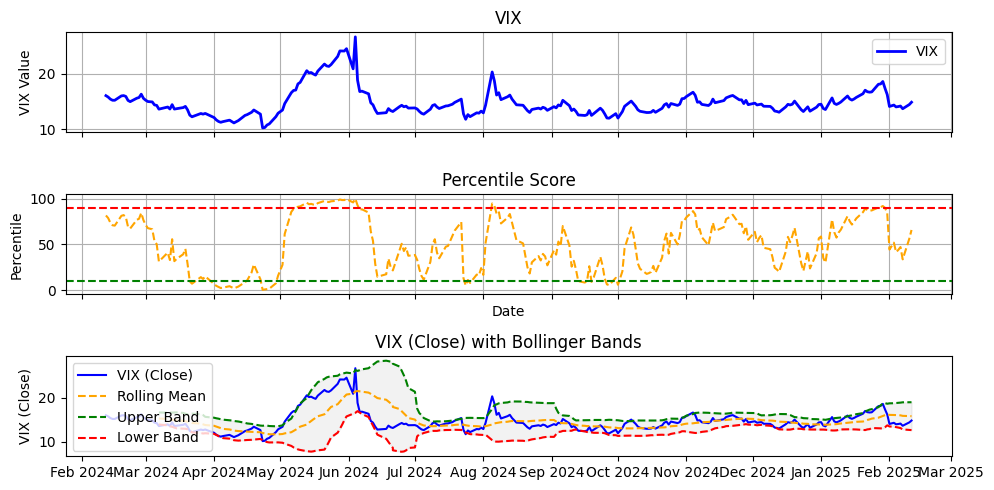

In [5]:
import matplotlib.dates as mdates

# Convert the index to datetime if not already
vix_data.index = pd.to_datetime(vix_data.index)

import matplotlib.pyplot as plt

# Create subplots
fig, axes = plt.subplots(3, 1, figsize=(10,5), sharex=True)

# Plot VIX in the first subplot
axes[0].plot(vix_data.index, vix_data['Close '], label='VIX', linewidth=2, color='blue')
axes[0].set_title('VIX')
axes[0].set_ylabel('VIX Value')
axes[0].grid(True)
axes[0].legend()

# Plot Percentile Score in the second subplot
axes[1].plot(vix_data.index, vix_data['Percentile'], label='Percentile Score', linestyle='--', color='orange')
axes[1].set_title('Percentile Score')
axes[1].set_ylabel('Percentile')
axes[1].set_xlabel('Date')
axes[1].grid(True)

axes[1].axhline(y=90, color='red', linestyle='--', label='80th Percentile')
axes[1].axhline(y=10, color='green', linestyle='--', label='20th Percentile')

axes[2].plot(vix_data.index, vix_data['Close '], label='VIX (Close)', color='blue')
axes[2].plot(vix_data.index, vix_data['Rolling Mean'], label='Rolling Mean', color='orange', linestyle='--')
axes[2].plot(vix_data.index, vix_data['Upper Band'], label='Upper Band', color='green', linestyle='--')
axes[2].plot(vix_data.index, vix_data['Lower Band'], label='Lower Band', color='red', linestyle='--')

axes[2].fill_between(vix_data.index, vix_data['Upper Band'].values, vix_data['Lower Band'].values, color='grey', alpha=0.1)

axes[2].set_title("VIX (Close) with Bollinger Bands")
axes[2].set_ylabel("VIX (Close)")
axes[2].legend()

# Adjust layout
plt.tight_layout()



# Format the x-axis to show months and years
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))

# Show the plot
plt.show()


Strategy Rules:
High Volatility Trade Setup:

Condition 1: VIX breaches upper Bollinger Band.
Condition 2: Percentile Rank >90%.
Action:
Sell volatility options or short volatility instruments.
Low Volatility Trade Setup:

Condition 1: VIX breaches lower Bollinger Band.
Condition 2: Percentile Rank <10%.
Action:
Buy volatility options or hedge against market shocks.